In [93]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import joblib
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

In [94]:
X_lsa = joblib.load('../../dataset/preprocessed_clustering.joblib')

In [37]:
X_lsa.shape

(17880, 2)

0 | 0
0 | 1
1 | 0
1 | 1
2 | 0
2 | 1


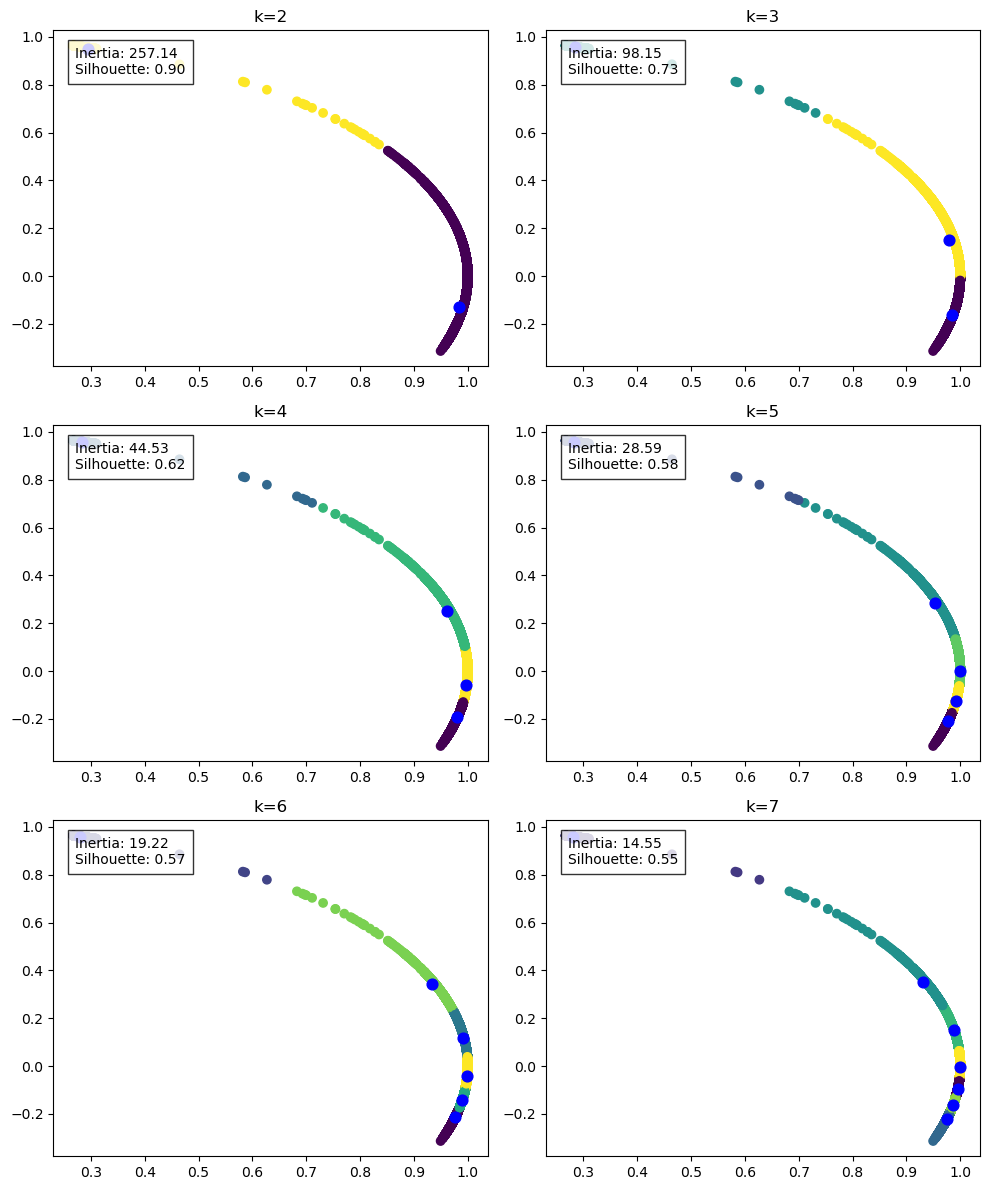

In [105]:
inertias = []
silhouettes = []
clusters = []
K = range(2, 8)

best_model = None
best_score = float('-inf')

N, M = 2, 2
fig, axs = plt.subplots(M, N, figsize=(10, 12))
for k, row, col in zip(K, (i // N for i in range(8 - 2)), (j % N for j in range(8 - 2))):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    y_kmeans = kmeans.fit_predict(X_lsa)

    ax = axs[row, col]
    ax.scatter(X_lsa[:, 0], X_lsa[:, 1], c=y_kmeans)
    
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='blue', marker='o')
    ax.set_title(f'k={k}')

    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(X_lsa, kmeans.labels_))
    clusters.append(y_kmeans)

    if curr_silhouette > best_score:
      best_score = curr_silhouette
      best_model = kmeans

    ax.text(0.05, 0.95,
            f'Inertia: {inertias[-1]:.2f}\n' + f'Silhouette: {silhouettes[-1]:.2f}',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ax.transAxes,
            fontsize=10,
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

plt.tight_layout()

In [75]:
print(best_score)
kmeans = best_model

0.9046139295482011


Text(0, 0.5, 'Inertia')

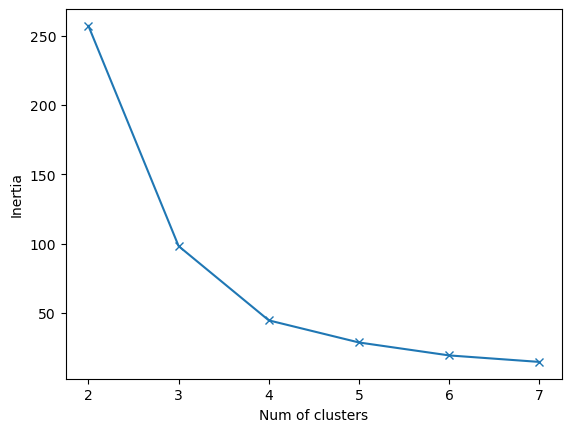

In [90]:
plt.plot(K, inertias, marker='x')
plt.xlabel('Num of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette')

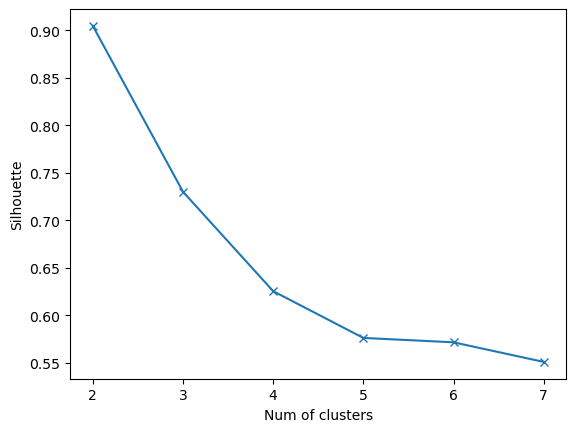

In [91]:
plt.plot(K, silhouettes, marker='x')
plt.xlabel("Num of clusters")
plt.ylabel("Silhouette")